In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()

2

In [13]:
print(len(df['Car_Name'].unique()))
print(df['Car_Name'].unique())

98
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Spl

In [15]:
lis=set(df['Car_Name'].unique())
lis

{'800',
 'Activa 3g',
 'Activa 4g',
 'Bajaj  ct 100',
 'Bajaj Avenger 150',
 'Bajaj Avenger 150 street',
 'Bajaj Avenger 220',
 'Bajaj Avenger 220 dtsi',
 'Bajaj Avenger Street 220',
 'Bajaj Discover 100',
 'Bajaj Discover 125',
 'Bajaj Dominar 400',
 'Bajaj Pulsar  NS 200',
 'Bajaj Pulsar 135 LS',
 'Bajaj Pulsar 150',
 'Bajaj Pulsar 220 F',
 'Bajaj Pulsar NS 200',
 'Bajaj Pulsar RS200',
 'Hero  CBZ Xtreme',
 'Hero  Ignitor Disc',
 'Hero Extreme',
 'Hero Glamour',
 'Hero Honda CBZ extreme',
 'Hero Honda Passion Pro',
 'Hero Hunk',
 'Hero Passion Pro',
 'Hero Passion X pro',
 'Hero Splender Plus',
 'Hero Splender iSmart',
 'Hero Super Splendor',
 'Honda Activa 125',
 'Honda Activa 4G',
 'Honda CB Hornet 160R',
 'Honda CB Shine',
 'Honda CB Trigger',
 'Honda CB Unicorn',
 'Honda CB twister',
 'Honda CBR 150',
 'Honda Dream Yuga ',
 'Honda Karizma',
 'Hyosung GT250R',
 'KTM 390 Duke ',
 'KTM RC200',
 'KTM RC390',
 'Mahindra Mojo XT300',
 'Royal Enfield Bullet 350',
 'Royal Enfield Classic

In [20]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [43]:
df=df.drop_duplicates()
df.duplicated().sum()

0

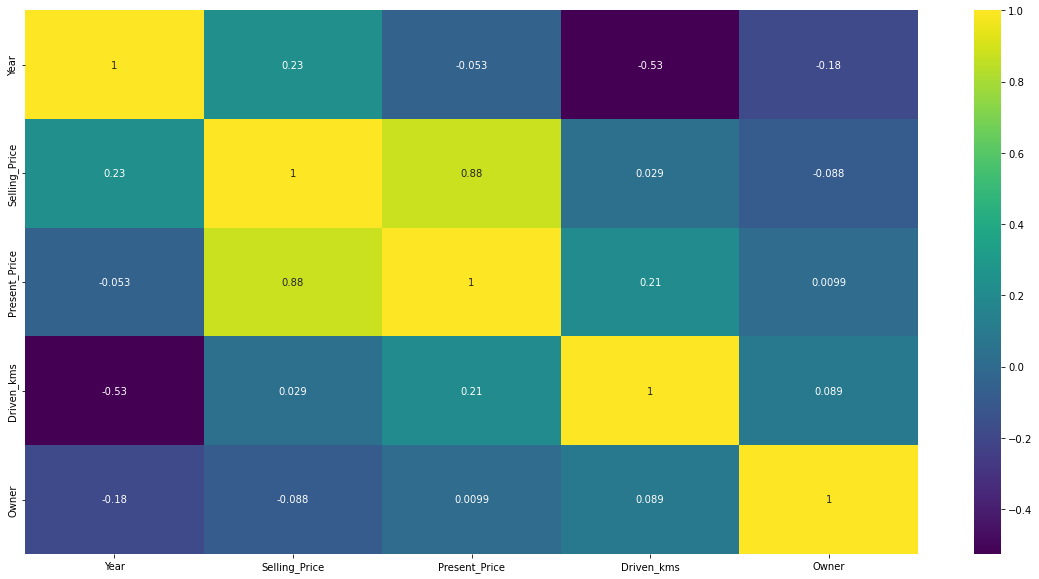

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [45]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

c:\Users\Silan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


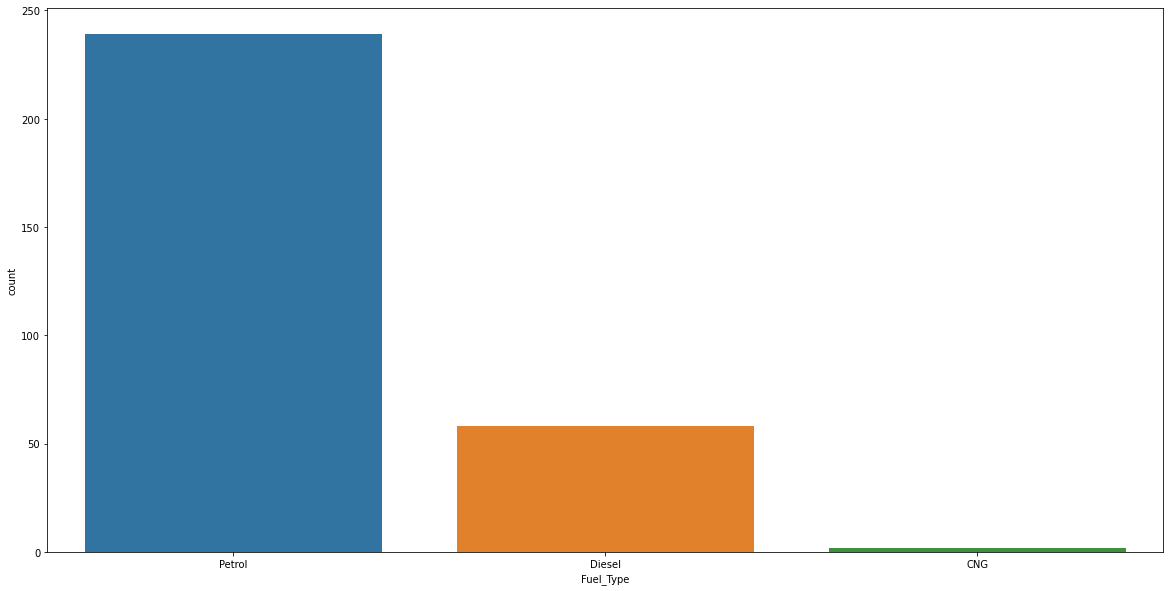

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(df['Fuel_Type'])
plt.show()


In [9]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [17]:
print(df['Year'].min(), df['Year'].max())

2003 2018


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
df['Car_Name']=le.fit_transform(df['Car_Name'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])

In [13]:
df.dtypes

Car_Name           int32
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int32
Selling_type       int32
Transmission       int32
Owner              int64
dtype: object

In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
X=df.drop(columns=['Selling_Price'])
X.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0


In [16]:
y=df.iloc[:,2:3]
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)
print(df.shape)

X_train shape is:  (239, 8)
X_test shape is:  (60, 8)
y_train shape is:  (239, 1)
y_test shape is:  (60, 1)
(299, 9)


In [18]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test)
y_pred

array([[ 0.0732433 ],
       [-0.93478362],
       [ 8.13037827],
       [ 1.54616697],
       [10.71174337],
       [ 5.17973373],
       [ 7.6601394 ],
       [ 1.6228938 ],
       [-0.14128296],
       [ 1.61480554],
       [ 7.23701073],
       [ 1.58456424],
       [ 5.87531661],
       [ 2.08491224],
       [ 1.19114296],
       [ 7.74934074],
       [ 8.81282194],
       [13.71881665],
       [ 3.80531522],
       [15.73486278],
       [-0.04808896],
       [ 6.33174988],
       [ 6.20060175],
       [ 3.49450446],
       [ 1.23882511],
       [ 4.82449242],
       [ 4.18038822],
       [ 0.46406711],
       [19.24824038],
       [ 9.31354591],
       [ 4.53406817],
       [ 5.66743071],
       [ 4.28194144],
       [ 7.00371308],
       [ 5.73338829],
       [ 6.0900704 ],
       [ 2.21642753],
       [15.15647461],
       [ 6.95870569],
       [-3.6544154 ],
       [ 2.24246351],
       [ 0.24639053],
       [ 2.12230775],
       [ 0.13160089],
       [-1.35558489],
       [-0

In [20]:
score=r2_score(y_test, y_pred)
score

0.875499390086937

In [21]:
print("model accuarcy is: ", np.round(score, 2)*100,"%.")

model accuarcy is:  88.0 %.


In [22]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("The mean absolute error is: ", mae)
print("mean squared error is: ", mse)
print("root mean squared error is: ", rmse)

The mean absolute error is:  1.2842890063179206
mean squared error is:  3.617838862844359
root mean squared error is:  1.9020617400190665


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

C:\Users\Silan\AppData\Local\Temp\ipykernel_19368\2097733062.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [24]:
score=r2_score(y_test, rf_model.predict(X_test))
score

0.9498145947803566

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
score=r2_score(y_test, dt_model.predict(X_test))
score

0.9402805206036637

In [27]:
joblib.dump(rf_model, 'model.pkl')

['model.pkl']